# Training Model 

```
Looking at each model under the hood. What are these models doing. How to change parameter values so that we can get best of the model with training data. 
First we will look at the Regression Model using direct Closed Form equation and compute model parameters that best fits the model to the training set. 
``` 

# 1. Linear Regression with Close form

``` 
In chapter 1 we saw: 
```
$life\space statisfaction = \theta_0 + \theta_1 * GDP\space per\space capita$

where $\theta_0$ is Bias (also called intercept) and $\theta_1$ is weight for input feature GDP per capita

``` 
Linear regression can be represented in following form 
```
$\^y = \theta_0 + \theta_1 x_1 + \theta_2 x_2 + ... + \theta_n x_n 
\newline
=> \^y = \theta x
\newline 
=> \^y = h_\theta (x)$ 
<br> 
$ where\space h_\theta $ is <b> <u> HYPOTHESIS FUNCTION. </b></u>
<br><br>
For linear regression problem idea is to minimize RMSE (Root Mean Squared Error). In practise we try to minimize MSE (squared of RMSE). MSE can be depcited as: <br>
$ MSE(X, h_\theta) = 1/m \sum_{i=1}^{m} (\theta^T x_i - y_i)^2  
\newline 
=> MSE(X, h_\theta) = 1/m \sum_{i=1}^{m} (\^y_i - y_i)^2  
$
<br><br>
Here, $\^y_i$ is predicted value for all values of $x_i$


``` 
The Normal Equation helps to find the weights (theta values) that minimizes cost funciton using closed solution: 
``` 
$\^\theta = (X^TX)^{-1} X^T y$
<br><br>
$\^\theta $ is the value of $\theta$ that minimizes cost function. and y is the target values $y_0$ to $y_n$

### Generate linear looking data to test the equation 

In [1]:
import numpy as np

# generate 100 random values for x between 0 and 1
X = 2 * np.random.rand(100, 1)

# y = 4 + 3x + some noise (randn will return values between -1 to 1)
y = 4 + 3 * X + np.random.randn(100, 1)

X[:10], y[:10]

(array([[1.41212541],
        [0.84979636],
        [0.58634038],
        [0.06537507],
        [0.11425442],
        [0.63530564],
        [0.47568005],
        [1.77962471],
        [1.99862965],
        [1.18990255]]),
 array([[8.17448502],
        [5.52147705],
        [5.52570432],
        [3.11289894],
        [4.28388754],
        [4.11334553],
        [3.97247546],
        [9.34501641],
        [9.88713324],
        [7.88919108]]))

Text(0, 0.5, 'y')

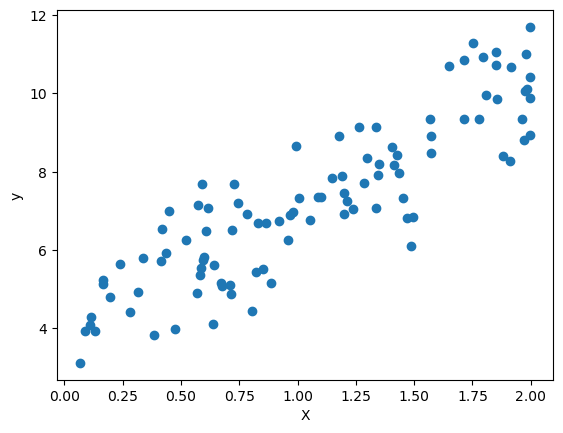

In [2]:
# plot this data 
import matplotlib.pyplot as plt 
plt.scatter(x=X, y=y)
plt.xlabel("X")
plt.ylabel("y")


In [3]:
# Lets compute theta value that can minimize the MSE 
X_b = np.c_[np.ones((100, 1)), X]     # add x_0 = 1 for all instances 
X_b[:10]

array([[1.        , 1.41212541],
       [1.        , 0.84979636],
       [1.        , 0.58634038],
       [1.        , 0.06537507],
       [1.        , 0.11425442],
       [1.        , 0.63530564],
       [1.        , 0.47568005],
       [1.        , 1.77962471],
       [1.        , 1.99862965],
       [1.        , 1.18990255]])

In [4]:
theta_best = np.linalg.inv(X_b.T.dot(X_b)).dot(X_b.T).dot(y)
theta_best

array([[3.9263069 ],
       [3.11783205]])

``` 
In our equation y = 4 + 3x + noise ; we had expected theta_0 = 4 and theta_1 = 3. But noise made it impossible to extract the original parameters 
```

### Making prediction using value of Theta 

In [5]:
# create a column vector with values 0 and 2 
X_new = np.array([[0], [2]]) 

# add x_0 = 1 to each instance 
X_new_b = np.c_[np.ones((2,1)), X_new]

# predict the values 
y_predict = X_new_b.dot(theta_best)
y_predict

array([[ 3.9263069],
       [10.161971 ]])

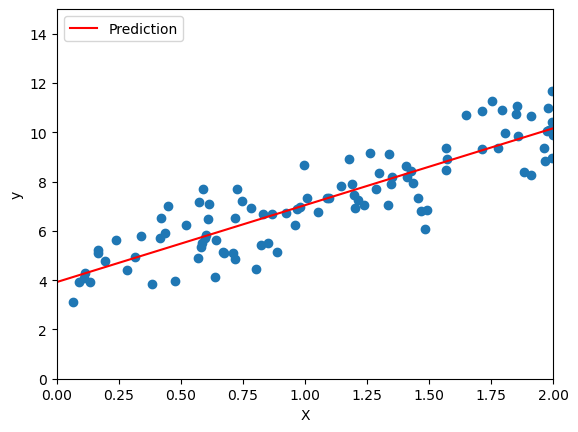

In [6]:
# plot these values 
plt.axis([0,2,0,15])
plt.scatter(x=X, y=y)
plt.plot(X_new, y_predict, "r-", label="Prediction")
plt.xlabel("X")
plt.ylabel("y")
plt.legend(loc="upper left")

### Applying same on Scikit learn linear regression model 

In [7]:
from sklearn.linear_model import LinearRegression

# create linear regression mode and fit the data
lin_reg = LinearRegression()
lin_reg.fit(X, y)

# get theta_0 and theta_1
lin_reg.intercept_, lin_reg.coef_

(array([3.9263069]), array([[3.11783205]]))

In [8]:
# compare above values with Normal equation value 
theta_best

array([[3.9263069 ],
       [3.11783205]])

In [9]:
# lets predict the values using scikit learn model 
y_predict_model = lin_reg.predict(X_new)
y_predict_model

array([[ 3.9263069],
       [10.161971 ]])

In [10]:
# compare the values predicted using normal equation 
y_predict

array([[ 3.9263069],
       [10.161971 ]])

# 2. Other Linear Regression Techniques

#### GD (Gradient Descent): 
```
 - Generic optimization technique capable of finding the solution to wide range of problems
 - General idea is to tweak the parameters iteratively to minimize the cost function 
 - Consider like finding the grandientin the direction of decreasing gradient value 
 - Very imporatant in SGD is learning rate 
    - If too small then it will take a long time to reach minima 
    - If too high then it will jump across the vally and may end up other side 
 - MSE cost function for Linear regression is convex function: 
    - It means if you pick any two points on curve. The line segment joining these points if does not passes or crosses the curve means -> there is global minima 
    - Also curve is continous i.e. slope does not change abruptly
 - Because of these two reasons, it is guranteed to get the global minima provided we wait for too long

#### a. Batch Gradient Descent
```
 - To calculate Gradient descent, you need to first calculate the gradient of cost functon with regard to each of the model parameter value theta_j
 i.e. how muct cost function will change by changing the value of theta_j by little bit
``` 

$ \partial {MSE(\theta)} / \partial {\theta_j} = 2/m \sum_{i=1}^{m} (\theta^T x_i - y_i) (x_{ij}) \newline
=> \nabla_{\theta} MSE(\theta)  = 2/m X^T(X\theta - y)$

``` 
 - the algo is terribly slow as it uses FULL TRAINING DATA at each Gradient Descent step - thus called Batch Gradient Descent. 
 - once you have gradient vector which points uphill, go in another direction. This implies 
```
$\theta^{(next\space step)} = \theta - \eta \nabla_{\theta} MSE(\theta) 
\newline \newline 
\eta\space is\space learning\space rate$

In [11]:
# set learning rate 
eta = 0.1

# epoch 
n_iterations = 1000 

# get the number of instances 
m = 100 

# get two values for theta between 0 and 1 
theta = np.random.rand(2,1)

# get new value of theta 
for iteration in range(n_iterations):
    # calculate the gradient 
    gradient = 2/m * X_b.T.dot(X_b.dot(theta) - y )

    # calculate the theta value 
    theta = theta - eta * gradient

    # print the values 
    print (f"iteration: {iteration}         ;theta: {theta}")

iteration: 0         ;theta: [[1.64302284]
 [2.2305301 ]]
iteration: 1         ;theta: [[2.28950447]
 [2.98094898]]
iteration: 2         ;theta: [[2.64614902]
 [3.37152801]]
iteration: 3         ;theta: [[2.84790619]
 [3.57050356]]
iteration: 4         ;theta: [[2.96674411]
 [3.66757566]]
iteration: 5         ;theta: [[3.04104735]
 [3.71056704]]
iteration: 6         ;theta: [[3.09129258]
 [3.72497067]]
iteration: 7         ;theta: [[3.12840733]
 [3.72437293]]
iteration: 8         ;theta: [[3.15822701]
 [3.71601151]]
iteration: 9         ;theta: [[3.18387155]
 [3.70373904]]
iteration: 10         ;theta: [[3.20701269]
 [3.68960332]]
iteration: 11         ;theta: [[3.22854973]
 [3.67468999]]
iteration: 12         ;theta: [[3.24896984]
 [3.65957177]]
iteration: 13         ;theta: [[3.26854024]
 [3.6445481 ]]
iteration: 14         ;theta: [[3.28741065]
 [3.62977285]]
iteration: 15         ;theta: [[3.30566792]
 [3.61532244]]
iteration: 16         ;theta: [[3.32336518]
 [3.60123214]]
iterati

In [12]:
theta

array([[3.9263069 ],
       [3.11783205]])

``` 
This is exactly same as what was predicted using closed form solution
``` 

In [13]:
theta_best

array([[3.9263069 ],
       [3.11783205]])

### Impact of Learning Rate

In [14]:
len(X_b)

100

In [15]:
theta_path_bgd = []

def plot_gradient_descent(theta, eta, theta_path=None):
    """ Plot gradient descent values """
    
    # get total number of points
    m = len(X_b)

    # plot these points on graph 
    plt.plot(X, y, "b.")

    # select number of iterations = 100 for Batch SGD 
    n_iterations = 1000

    # iterate over 
    for iteration in range(n_iterations):

        # if iteration value is less than 10 then predict the value of y using theta value and plot as blue line if iteration > 0; red line for iteration = 0
        if iteration < 10:
            y_predict = X_new_b.dot(theta)
            style = "b-" if iteration > 0 else "r--"
            plt.plot(X_new, y_predict, style)

        # calculate the gradient decent value 
        gradients = 2/m * X_b.T.dot(X_b.dot(theta) - y)

        # perform batch gradient descent and calculate next theta value 
        theta = theta - eta * gradients

        # add the theta value to list 
        if theta_path is not None:
            theta_path.append(theta)
    
    # plot the digram 
    plt.xlabel("$x_1$", fontsize=18)
    plt.axis([0, 2, 0, 15])
    plt.title(r"$\eta = {}$".format(eta), fontsize=16)

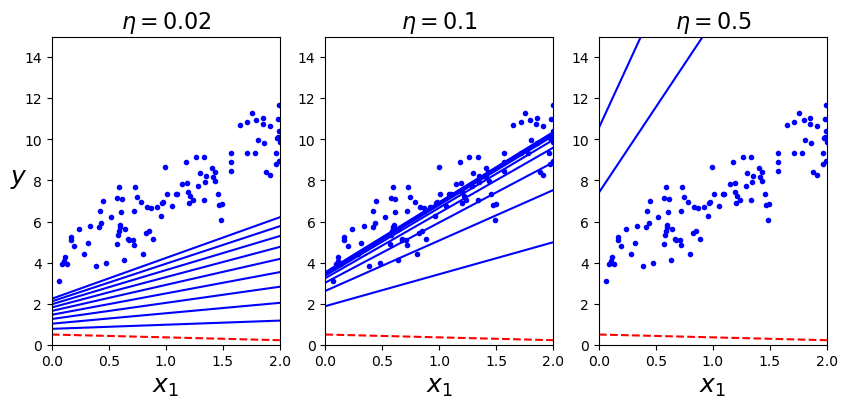

In [16]:
np.random.seed(42)
theta = np.random.randn(2,1)  # random initialization

plt.figure(figsize=(10,4))

# plot for learning rate = 0.02 (too small)
plt.subplot(131); plot_gradient_descent(theta, eta=0.02)
plt.ylabel("$y$", rotation=0, fontsize=18)

# plot for learning rate = 0.1 (sizeable) 
plt.subplot(132); plot_gradient_descent(theta, eta=0.1, theta_path=theta_path_bgd)

# plot for learning rate = 0.5 (large)
plt.subplot(133); plot_gradient_descent(theta, eta=0.5)
plt.show()

```
- if learning rate is too low; algo will evnetually converge and provide the solution 
- if learning rate is medium; algo will be able to converge in few iteration 
- if learning rate is high; values will be all over the place and divering from the solution 
```

#### b. Stochastic Gradient Descent

``` 
 - Main problem with Batch Gradient Descent is it uses the whole training set to gradient at every step which makes algo very slow when training data is large.
 - Stochastic Gradient Descent pick random instance of training set and at every step computes the gradient based on that instance 
 - Since this algo works with one instance at a time, the algo is very fast and also makes it possible to manipulate and out of core learning 
 - Due to Stochastic (random) nature, SGD is less regular than BGD; instead of gently reaching to minimum it jumps around until algo stops 
 - Once algo stops; final parameters are good but not optimal 

 - However, there is a good chance for SGD to find the global minimum compared to BGD. thus randomness is good for avoiding local minima
 - To avoid there is a concept called : 
 ``` 

<b> <u> STIMULATED ANNEALING </u> </b>
``` 
Here reduce the learning rate gradually. Start with high learning rate initially and keep reducing over a period of time. 
The function that determines the learning rate is called "LEARNING SCHEDULE" 
```

In [17]:
m

100

In [18]:
n_iterations = 50 

# learning rate hyper-parameters
t0, t1 = 5, 50 

def learning_schedule(t): 
    return t0/(t + t1)

# initialize theta value randomly 
theta_sgd = np.random.randn(2,1)

# iterate over 
for iteration in range(n_iterations):

    # iterate over all instances of the training 
    for i in range(m): 
        random_index = np.random.randint(m)

        # get the random index 
        xi = X_b[random_index:random_index+1]

        # get the random index label 
        yi = y[random_index: random_index+1]

        # calculate gradient value for that instance (since value of m in formula is 1 therefore 2*xi...)
        gradient = 2 * xi.T.dot(xi.dot(theta_sgd) - yi)

        # get the learning rate 
        eta = learning_schedule(iteration * m + i)

        # get the theta value 
        theta_sgd = theta_sgd - eta * gradient

        print (f"iteration: {iteration}         ; instance: {i}      ;theta: {theta}")

iteration: 0         ; instance: 0      ;theta: [[ 0.49671415]
 [-0.1382643 ]]
iteration: 0         ; instance: 1      ;theta: [[ 0.49671415]
 [-0.1382643 ]]
iteration: 0         ; instance: 2      ;theta: [[ 0.49671415]
 [-0.1382643 ]]
iteration: 0         ; instance: 3      ;theta: [[ 0.49671415]
 [-0.1382643 ]]
iteration: 0         ; instance: 4      ;theta: [[ 0.49671415]
 [-0.1382643 ]]
iteration: 0         ; instance: 5      ;theta: [[ 0.49671415]
 [-0.1382643 ]]
iteration: 0         ; instance: 6      ;theta: [[ 0.49671415]
 [-0.1382643 ]]
iteration: 0         ; instance: 7      ;theta: [[ 0.49671415]
 [-0.1382643 ]]
iteration: 0         ; instance: 8      ;theta: [[ 0.49671415]
 [-0.1382643 ]]
iteration: 0         ; instance: 9      ;theta: [[ 0.49671415]
 [-0.1382643 ]]
iteration: 0         ; instance: 10      ;theta: [[ 0.49671415]
 [-0.1382643 ]]
iteration: 0         ; instance: 11      ;theta: [[ 0.49671415]
 [-0.1382643 ]]
iteration: 0         ; instance: 12      ;theta: [

In [19]:
theta_sgd

array([[3.90071895],
       [3.13302498]])

In [20]:
theta_best

array([[3.9263069 ],
       [3.11783205]])

``` 
As expected SGD is giving a good value but not optimal one 
```

(np.float64(0.0), np.float64(2.0), np.float64(0.0), np.float64(15.0))

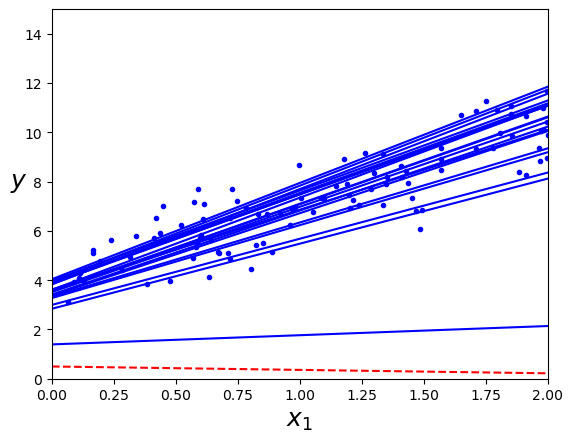

In [21]:
# create empty list of theta_sgd values 
theta_path_sgd = []

# get the len of traning set 
m = len(X_b)
np.random.seed(42)

# set number of iterations to 50 
n_epochs = 50

# learning schedule hyperparameters
t0, t1 = 5, 50  

# assign random theta value
theta = np.random.randn(2,1) 

# iterate of number of iterations 
for epoch in range(n_epochs):

    # iterate over number instances 
    for i in range(m):

        # if this is first iteration draw first 20 lines 
        if epoch == 0 and i < 20:                    
            y_predict = X_new_b.dot(theta)          
            style = "b-" if i > 0 else "r--"        
            plt.plot(X_new, y_predict, style)   

        # assign random index      
        random_index = np.random.randint(m)

        # get the traning data nad corressponding label value for randomly selected index
        xi = X_b[random_index:random_index+1]
        yi = y[random_index:random_index+1]

        # calculate grandient value 
        gradients = 2 * xi.T.dot(xi.dot(theta) - yi)

        # caluclate learning rate 
        eta = learning_schedule(epoch * m + i)

        # get the theta value 
        theta = theta - eta * gradients
        theta_path_sgd.append(theta)                 

plt.plot(X, y, "b.")                                 
plt.xlabel("$x_1$", fontsize=18)                 
plt.ylabel("$y$", rotation=0, fontsize=18)    
plt.axis([0, 2, 0, 15])                        

``` 
Using Random indexes - there is a high chance some of the instances goes to algo multiple times and some have not made to the algo at all. 
In such case you can use data shuffling - read the instance one by one then again shuffle the data
```

#### perform SGD using Scikit learn

In [22]:
y[:10]

array([[8.17448502],
       [5.52147705],
       [5.52570432],
       [3.11289894],
       [4.28388754],
       [4.11334553],
       [3.97247546],
       [9.34501641],
       [9.88713324],
       [7.88919108]])

In [23]:
# convert multi-dimensional array to single dimensional array
y.ravel()[:10]

array([8.17448502, 5.52147705, 5.52570432, 3.11289894, 4.28388754,
       4.11334553, 3.97247546, 9.34501641, 9.88713324, 7.88919108])

In [24]:
from sklearn.linear_model import SGDRegressor
sgd_clf = SGDRegressor(max_iter=1000, tol=1e-3, penalty=None, eta0=0.1)
sgd_clf.fit(X, y.ravel())
sgd_clf.intercept_, sgd_clf.coef_

(array([3.95787408]), array([3.16246561]))

In [25]:
theta

array([[3.9032674],
       [3.1329845]])

In [26]:
theta_best

array([[3.9263069 ],
       [3.11783205]])

#### c. Mini Batch Gradient Descent
``` 
 - This best of both worlds for SGD and Batch Gradient Descent. Instead of using complete data (Batch Gradient Descent) or just an instance (SGD) to calculate Gradient. Mini-Batch GD takes smaller set of random instances. 
 - However, it may still end up in local minima 
```

In [27]:
theta_path_mgd = []

# set number of iteratiosn to 50 
n_iterations = 50

# set batch size to 20 
minibatch_size = 20

np.random.seed(42)

# set random value for theta at the start 
theta = np.random.randn(2,1)  

# learning rate parameters 
t0, t1 = 200, 1000

t = 0
for epoch in range(n_iterations):

    # get shuffleds indices 
    shuffled_indices = np.random.permutation(m)

    # get the indices from training set 
    X_b_shuffled = X_b[shuffled_indices]
    y_shuffled = y[shuffled_indices]

    # now iterate from 0 to 100 with a set of 20 elements 
    for i in range(0, m, minibatch_size):

        t += 1

        # get the set training data 
        xi = X_b_shuffled[i:i+minibatch_size]
        yi = y_shuffled[i:i+minibatch_size]

        # calculate grandient
        gradients = 2/minibatch_size * xi.T.dot(xi.dot(theta) - yi)

        # update learning rate
        eta = learning_schedule(t)

        # get the theta value 
        theta = theta - eta * gradients
        theta_path_mgd.append(theta)

        print (f"iteration: {iteration}         ; instance: {i}      ;theta: {theta}")

iteration: 49         ; instance: 0      ;theta: [[3.50077623]
 [3.74997815]]
iteration: 49         ; instance: 20      ;theta: [[3.36534539]
 [3.53369376]]
iteration: 49         ; instance: 40      ;theta: [[3.41600243]
 [3.48477101]]
iteration: 49         ; instance: 60      ;theta: [[3.38416245]
 [3.48199   ]]
iteration: 49         ; instance: 80      ;theta: [[3.49805507]
 [3.55193763]]
iteration: 49         ; instance: 0      ;theta: [[3.52350647]
 [3.48192644]]
iteration: 49         ; instance: 20      ;theta: [[3.76457099]
 [3.71451835]]
iteration: 49         ; instance: 40      ;theta: [[3.50239167]
 [3.45849626]]
iteration: 49         ; instance: 60      ;theta: [[3.41278703]
 [3.27879057]]
iteration: 49         ; instance: 80      ;theta: [[3.47140216]
 [3.31571046]]
iteration: 49         ; instance: 0      ;theta: [[3.48188047]
 [3.30340801]]
iteration: 49         ; instance: 20      ;theta: [[3.64048917]
 [3.50523539]]
iteration: 49         ; instance: 40      ;theta: [[3.5

In [28]:
theta

array([[4.03441845],
       [3.23136754]])

In [29]:
theta_best

array([[3.9263069 ],
       [3.11783205]])

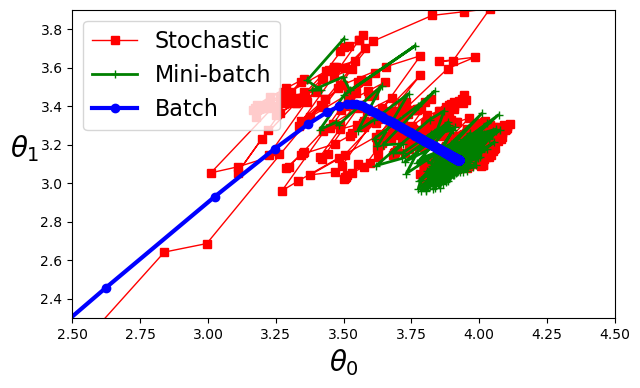

In [30]:
# plot theta path taken by Batch, SGD and Mini Batch 
theta_path_bgd = np.array(theta_path_bgd)
theta_path_sgd = np.array(theta_path_sgd)
theta_path_mgd = np.array(theta_path_mgd)

plt.figure(figsize=(7,4))
plt.plot(theta_path_sgd[:, 0], theta_path_sgd[:, 1], "r-s", linewidth=1, label="Stochastic")
plt.plot(theta_path_mgd[:, 0], theta_path_mgd[:, 1], "g-+", linewidth=2, label="Mini-batch")
plt.plot(theta_path_bgd[:, 0], theta_path_bgd[:, 1], "b-o", linewidth=3, label="Batch")
plt.legend(loc="upper left", fontsize=16)
plt.xlabel(r"$\theta_0$", fontsize=20)
plt.ylabel(r"$\theta_1$   ", fontsize=20, rotation=0)
plt.axis([2.5, 4.5, 2.3, 3.9])
plt.show()

# 2. Polynomial Regression

``` 
Not all data will be linear. What if data cannot fit to a straight line? You can still use Linear Regression Model. 
Idea is to add powers of each feature as new feature. Then traing the linear model with extended set of features. This technique is called Polynomial regression
```

In [31]:
m = 100 

# create X data 
X = 6 * np.random.rand(m, 1) - 3
X[:10]

array([[ 2.38942838],
       [ 1.66081999],
       [-2.54112027],
       [ 2.92037461],
       [-1.37180422],
       [-2.40850244],
       [ 1.9758854 ],
       [ 1.2400532 ],
       [ 0.70331284],
       [-2.06411482]])

In [32]:
# create y data 
y = 0.5 + X**2 + X + 2 + np.random.randn(m, 1)

Text(0, 0.5, 'y')

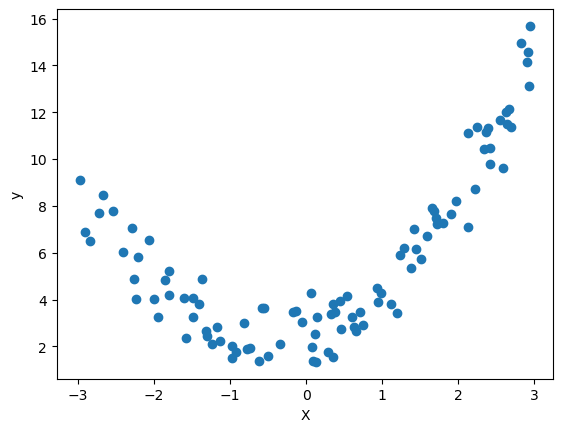

In [33]:
# Plot this
plt.scatter(x=X, y=y)
plt.xlabel("X")
plt.ylabel("y")

``` 
Straight line cannot fit here. So using scikit PolynomialFeatures class transform training data, adding the square(second degree polynomial) of each feature in training set as new feature
```

In [34]:
from sklearn.preprocessing import PolynomialFeatures
poly_features = PolynomialFeatures(degree=2, include_bias=False)
X_poly = poly_features.fit_transform(X)

In [35]:
X[:10]

array([[ 2.38942838],
       [ 1.66081999],
       [-2.54112027],
       [ 2.92037461],
       [-1.37180422],
       [-2.40850244],
       [ 1.9758854 ],
       [ 1.2400532 ],
       [ 0.70331284],
       [-2.06411482]])

In [36]:
X_poly[:10]

array([[ 2.38942838,  5.709368  ],
       [ 1.66081999,  2.75832305],
       [-2.54112027,  6.45729221],
       [ 2.92037461,  8.52858786],
       [-1.37180422,  1.88184681],
       [-2.40850244,  5.80088399],
       [ 1.9758854 ,  3.90412313],
       [ 1.2400532 ,  1.53773194],
       [ 0.70331284,  0.49464894],
       [-2.06411482,  4.26056998]])

In [37]:
# create a linear regression model 
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()
lin_reg.fit(X_poly, y)

lin_reg.intercept_, lin_reg.coef_

(array([2.4735233]), array([[0.95038538, 1.02577032]]))

``` 
so the equation considering the values above is 
``` 
$y = 1.02x^2 + 0.95x + 2.47$ 

However, original was: <br>
$y = 0.5 + x^2 + x + 2 + np.random.randn(m, 1)$

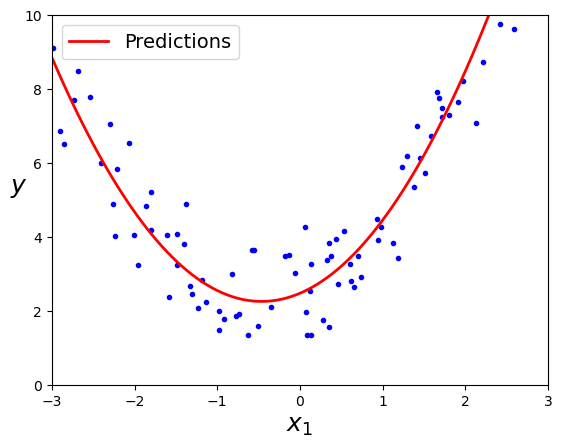

In [38]:
# get  points between -3 and 3 evely spaced out ``
X_new=np.linspace(-3, 3, 100).reshape(100, 1)
X_new_poly = poly_features.transform(X_new)
y_new_predict = lin_reg.predict(X_new_poly)

# Lets predict the same data using regressor model and then plot 
# this will be all over places but will maintain the curve
y_pred = lin_reg.predict(X_poly)


# Plot this 
plt.plot(X, y, "b.")
plt.plot(X_new, y_new_predict, "r-", linewidth=2, label="Predictions")
# plt.plot(X, y_pred, "g-", linewidth=2, label="Predictions")
plt.xlabel("$x_1$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.legend(loc="upper left", fontsize=14)
plt.axis([-3, 3, 0, 10])
plt.show()

# Learning Curves 

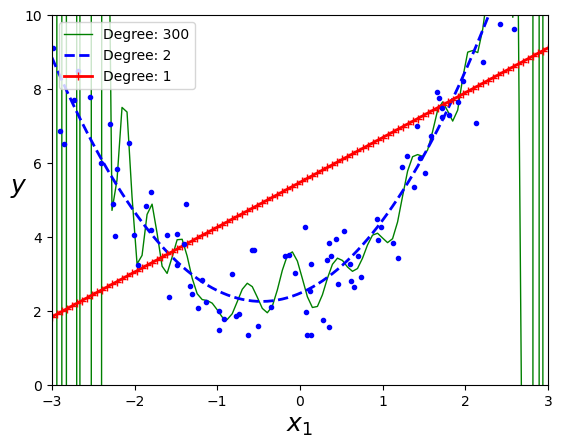

In [39]:
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

# iterate over high degree polynomial (300), quadratic (2) and linear
for style, width, degree in (("g-", 1, 300), ("b--", 2, 2), ("r-+", 2, 1)):
    polybig_features = PolynomialFeatures(degree=degree, include_bias=False)
    std_scaler = StandardScaler()
    lin_reg = LinearRegression()
    polynomial_regression = Pipeline([
            ("poly_features", polybig_features),
            ("std_scaler", std_scaler),
            ("lin_reg", lin_reg),
        ])
    polynomial_regression.fit(X, y)
    y_newbig = polynomial_regression.predict(X_new)
    plt.plot(X_new, y_newbig, style, label=f"Degree: {str(degree)}", linewidth=width)

plt.plot(X, y, "b.", linewidth=3)
plt.legend(loc="upper left")
plt.xlabel("$x_1$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.axis([-3, 3, 0, 10])
plt.show()

``` 
Green lines clearly shows the model is overfitting with degree=300 -> OVerfitting
Blue is quadratic equation line 
and red is linear regression line - Underfitting

```
Learning Curve is one of the method to understand if data is overfitting or not. Other than Cross Validation Process - this is one of the approach to understand the data
```

In [40]:
X[:10], y[:10]

(array([[ 2.38942838],
        [ 1.66081999],
        [-2.54112027],
        [ 2.92037461],
        [-1.37180422],
        [-2.40850244],
        [ 1.9758854 ],
        [ 1.2400532 ],
        [ 0.70331284],
        [-2.06411482]]),
 array([[11.34094919],
        [ 7.91795969],
        [ 7.78828879],
        [14.55620792],
        [ 4.89737849],
        [ 6.01188408],
        [ 8.20668738],
        [ 5.88509251],
        [ 3.4815506 ],
        [ 6.54901989]]))

#### Underfitting - Learning curves

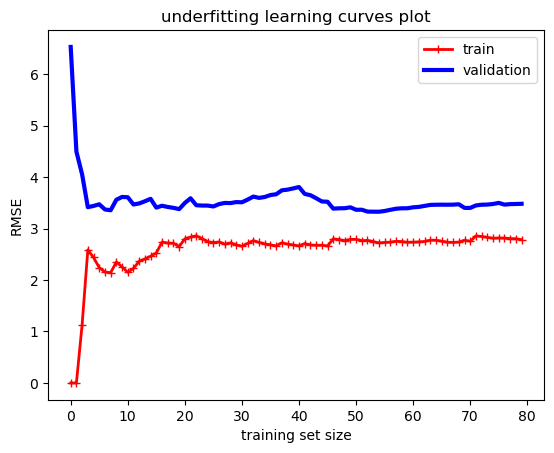

In [41]:
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

def plot_learning_curve(model, X, y):
    # split the training and test data  
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

    # create empty list of training and test error 
    train_error, test_error = [], [] 

    # iterate over training data 
    for m in range(1, len(X_train)+1):

        # fit the instances - increase number of instances iteratively 
        model.fit(X_train[:m], y_train[:m])

        # predict the same values when included in the model 
        y_train_predict = model.predict(X_train[:m])

        # get y prediction for test set 
        y_test_predict = model.predict(X_test)

        # calculate mean squared error for training set 
        train_error.append(mean_squared_error(y_train[:m], y_train_predict))

        # calculate mean sqaured error for test set 
        test_error.append(mean_squared_error(y_test, y_test_predict))

    # plot the mean sqaured error calculated iteratively 
    plt.plot(np.sqrt(train_error), "r-+", linewidth=2, label="train")
    plt.plot(np.sqrt(test_error), "b-", linewidth=3, label="validation")
    plt.legend(loc="upper right")
    plt.xlabel("training set size")
    plt.ylabel("RMSE")
    

# create linear regression mode and pass X and y values generated for polynomial regression 
lin_reg = LinearRegression() 
plot_learning_curve(lin_reg, X, y)
plt.title("underfitting learning curves plot")
plt.show()

``` 
Analysis of curve above: 
Firstly looking at the training set. When training started the model was able to fit the data and therefore RMSE=0 when it started. It began increasing as this is Non-Linear data (Polynomial Data used for training with Linear Regression) and after certain iterations the RMSE value didn't change much (reached pleatue). After this adding new instances made no sense in the training set. 

Now looking at validation set - during initial iterations the model was unable to generalize properly and therefore RMSE value was very high. After some iterations, validation error began to go down and reached a pleatue (very near to training curve). 

This represents underfitting as both curves reached pleatue and are fairly close but high.

### Overfitting learning curves

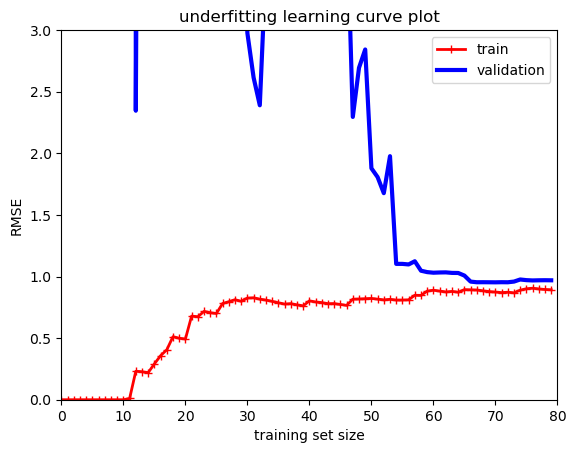

In [42]:
polynomial_regression = Pipeline([
    ("poly_features", PolynomialFeatures(degree=10, include_bias=False)), 
    ("lin_reg", LinearRegression())
])

# plot the RMSE learning curve 
plot_learning_curve(polynomial_regression, X, y)
plt.axis([0, 80, 0, 3])
plt.title("underfitting learning curve plot")
plt.show()                   

``` 
This looks almost similar to previos plot, but there are few distinctions here: 
 a. On an Average the error is much lower than the linear regression. 
 b. once both curves reaches pleatue the curves are very close to each other. This is hallmark for overfitting. 
```

#### For understanding lets plot RMSE curve for polynomial but with degree 2 (which is what the actual data is)

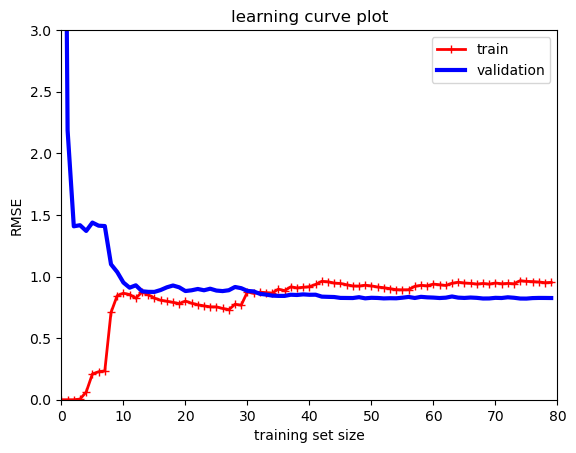

In [43]:
polynomial_regression = Pipeline([
    ("poly_features", PolynomialFeatures(degree=2, include_bias=False)), 
    ("lin_reg", LinearRegression())
])

# plot the RMSE learning curve 
plot_learning_curve(polynomial_regression, X, y)
plt.axis([0, 80, 0, 3])
plt.title("learning curve plot")
plt.show()       

``` 
Here validation error has reached to the training error - something we wanted


# 3. Regularization 
```
- Regularization means applying contraints to the model so that it does not overfit. 
- With fewer degree of freedom, it will harder for data to overfit. 
- Simplest way to regularize polynomial model is to reduce the polynomial degree 
- For Linear Model, regularization can be achieved by contraining the weights of the model 
```

### Ridge Regression
$ \alpha \sum_{i=1}^{n} \theta^2 $ is added to the cost function 
```
This doesnot only avoids overfitting also keeps model weights as small as possible 
NOTE - Regularization must be added during training only

After training the unregularized performance can be used to evaluate model performance
```
Model parameter $\alpha$ controls hjow much you want to regularize the model <br>
If $\alpha$ is Zero then Ridge regression becomes Linear Regression <br>
If $\alpha$ is very large, then all weights end up close to zero and result is flat line going through data's mean<br>
<br>
Ridge Regression Cost Function: <br>

$J(\theta) = MSE(\theta) + \alpha (1/2) \sum_{i=1}^{n} \theta^2$
<br><br>

```
Closed Form equation for Ridge Regression 
```
$\^\theta = (X^TX + \alpha A)^{-1} X^T y$

In [44]:
np.random.seed(42)

# number of instance = 20 
m = 20

# get random values for X 
X = 3 * np.random.rand(m, 1)

# calculate the y based on the values from X. Increase the bias 
y = 1 + 0.5 * X + np.random.randn(m, 1) / 1.5

# create 100 evenly shaped data between 0 to 3 
X_new = np.linspace(0, 3, 100).reshape(100, 1)

In [45]:
X_new[:10], len(X_new)


(array([[0.        ],
        [0.03030303],
        [0.06060606],
        [0.09090909],
        [0.12121212],
        [0.15151515],
        [0.18181818],
        [0.21212121],
        [0.24242424],
        [0.27272727]]),
 100)

In [46]:
X[:10], len(X)

(array([[1.12362036],
        [2.85214292],
        [2.19598183],
        [1.79597545],
        [0.46805592],
        [0.46798356],
        [0.17425084],
        [2.59852844],
        [1.80334504],
        [2.12421773]]),
 20)

Text(0, 0.5, 'y')

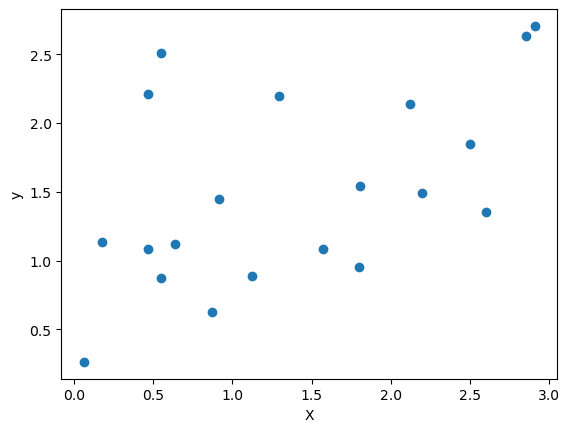

In [47]:
# plot the points on scatter plot 
plt.scatter(x=X, y=y)
plt.xlabel("X")
plt.ylabel("y")

In [48]:
from sklearn.linear_model import Ridge

# create ridge regression model 
ridge_reg = Ridge(alpha=1, solver="cholesky", random_state=42)
ridge_reg.fit(X, y)
ridge_reg.predict([[1.5]])

array([1.55071465])

In [49]:
ridge_reg.intercept_, ridge_reg.coef_

(array([1.00650911]), array([0.36280369]))

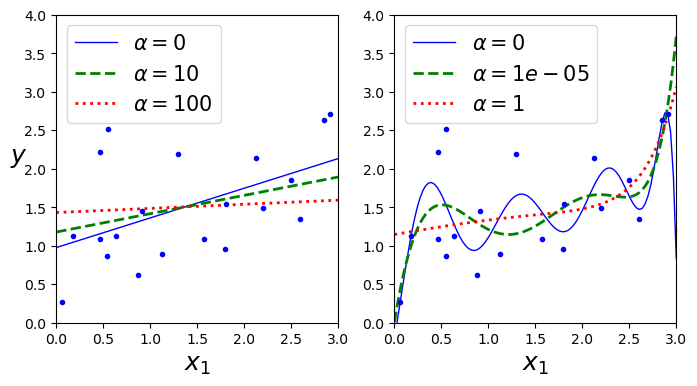

In [50]:
from sklearn.linear_model import Ridge

def plot_model(model_class, polynomial, alphas, **model_kargs):

    # set values of alpha and style iteratively
    for alpha, style in zip(alphas, ("b-", "g--", "r:")):

        # get the model; if alpha > 0 then select ridge else linear regression model
        model = model_class(alpha, **model_kargs) if alpha > 0 else LinearRegression()

        # if polynomial regression create polynomial regression pipeline 
        if polynomial:
            model = Pipeline([
                    ("poly_features", PolynomialFeatures(degree=10, include_bias=False)),
                    ("std_scaler", StandardScaler()),
                    ("regul_reg", model),
                ])
        
        # fit the model 
        model.fit(X, y)

        # predict values on 100 elements 
        y_new_regul = model.predict(X_new)

        # set line width 
        lw = 2 if alpha >0 else 1

        # plot the line on the graph 
        plt.plot(X_new, y_new_regul, style, linewidth=lw, label=r"$\alpha = {}$".format(alpha))
    
    # plot scatter points on the graph 
    plt.plot(X, y, "b.", linewidth=3)
    plt.legend(loc="upper left", fontsize=15)
    plt.xlabel("$x_1$", fontsize=18)
    plt.axis([0, 3, 0, 4])

plt.figure(figsize=(8,4))

# plot for ridge regression; non-polynomial with alpha values from 0 to 100 
plt.subplot(121)
plot_model(Ridge, polynomial=False, alphas=(0, 10, 100), random_state=42)
plt.ylabel("$y$", rotation=0, fontsize=18)

# plot for ridge regression; polynomial with alpha value ranging from 0 to 1
plt.subplot(122)
plot_model(Ridge, polynomial=True, alphas=(0, 10**-5, 1), random_state=42)
plt.show()

In [51]:
sgd_reg = SGDRegressor(penalty="l2", max_iter=1000, tol=1e-3, random_state=42)
sgd_reg.fit(X, y.ravel())
sgd_reg.predict([[1.5]])

array([1.47012588])

# Lasso Regression 
```
Least absolute shrinkage and selection operator regression is another regularized version for linear regression. 
It adds regularization term to the cost function but uses l1 norm of weight vectos instead of squared of l2 norm. 
```
$J(\theta) = MSE(\theta) + \alpha \sum_{i=1}^{n} |\theta_i|$

``` 
Important characterstic of lasso regression is it tends to eliminate the weight of least important feature (i.e. sets them to zero)
In other words, lasso regression can perform feature selection automatically and output sparse model i.e. with few non zero weights
```

/Users/rohitabhishek/miniconda3/envs/mlenv/lib/python3.11/site-packages/sklearn/linear_model/_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.803e+00, tolerance: 9.295e-04
  model = cd_fast.enet_coordinate_descent(


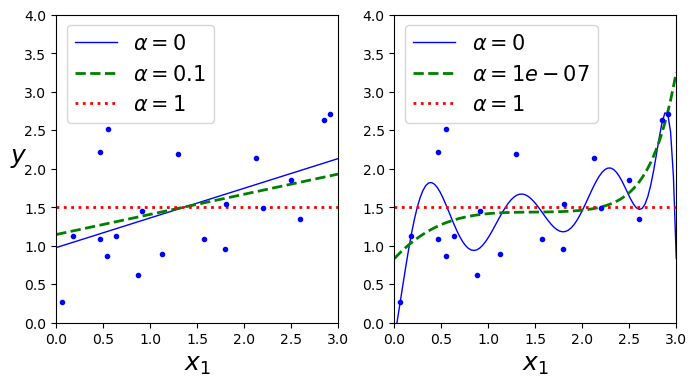

In [52]:
from sklearn.linear_model import Lasso

plt.figure(figsize=(8,4))
plt.subplot(121)
plot_model(Lasso, polynomial=False, alphas=(0, 0.1, 1), random_state=42)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.subplot(122)
plot_model(Lasso, polynomial=True, alphas=(0, 10**-7, 1), random_state=42)

plt.show()

In [53]:
from sklearn.linear_model import Lasso
lasso_reg = Lasso(alpha=0.1)
lasso_reg.fit(X, y)
lasso_reg.predict([[1.5]])

array([1.53788174])

<b> Ridge regression</b> is good for scenarios with many relevant predictors and correlated features as it shrinks the coefficient without remaining features <br>
<b> Lasso regression </b> is good when you want to perform feature selection and simplify the model by removing irrelevant features 

In [54]:
np.c_[(1,2,3), (4,5,6)]

array([[1, 4],
       [2, 5],
       [3, 6]])

In [55]:
np.meshgrid((1,2,3), (4,5,6))

(array([[1, 2, 3],
        [1, 2, 3],
        [1, 2, 3]]),
 array([[4, 4, 4],
        [5, 5, 5],
        [6, 6, 6]]))

In [56]:
t1a, t1b, t2a, t2b = -1, 3, -1.5, 1.5

# create evenly spaced 500 points between -1 and 3 (X-axis)
t1s = np.linspace(t1a, t1b, 500)

# create evenly spaced 500 points between -1.5 and 1.5 (Y-axis)
t2s = np.linspace(t2a, t2b, 500)

# get the coodrinate matrix for points generated 
t1, t2 = np.meshgrid(t1s, t2s)

# create a column matrix for values from t1 and t2 
T = np.c_[t1.ravel(), t2.ravel()]

# create an array of values
Xr = np.array([[1, 1], [1, -1], [1, 0.5]])

# calucate y value for given X 
yr = 2 * Xr[:, :1] + 0.5 * Xr[:, 1:]

# calculate value of J for 
J = (1/len(Xr) * np.sum((T.dot(Xr.T) - yr.T)**2, axis=1)).reshape(t1.shape)

# create N1 and N2 values 
N1 = np.linalg.norm(T, ord=1, axis=1).reshape(t1.shape)
N2 = np.linalg.norm(T, ord=2, axis=1).reshape(t1.shape)

t_min_idx = np.unravel_index(np.argmin(J), J.shape)
t1_min, t2_min = t1[t_min_idx], t2[t_min_idx]

t_init = np.array([[0.25], [-1]])


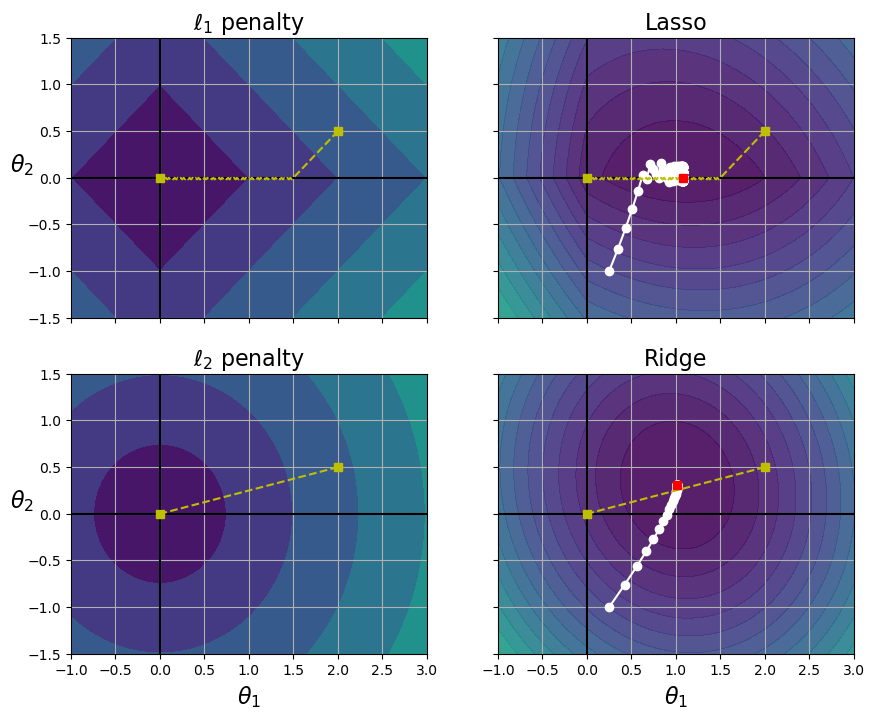

In [57]:
def bgd_path(theta, X, y, l1, l2, core = 1, eta = 0.05, n_iterations = 200):
    path = [theta]
    for iteration in range(n_iterations):
        gradients = core * 2/len(X) * X.T.dot(X.dot(theta) - y) + l1 * np.sign(theta) + l2 * theta
        theta = theta - eta * gradients
        path.append(theta)
    return np.array(path)

fig, axes = plt.subplots(2, 2, sharex=True, sharey=True, figsize=(10.1, 8))
for i, N, l1, l2, title in ((0, N1, 2., 0, "Lasso"), (1, N2, 0,  2., "Ridge")):
    JR = J + l1 * N1 + l2 * 0.5 * N2**2
    
    tr_min_idx = np.unravel_index(np.argmin(JR), JR.shape)
    t1r_min, t2r_min = t1[tr_min_idx], t2[tr_min_idx]

    levelsJ=(np.exp(np.linspace(0, 1, 20)) - 1) * (np.max(J) - np.min(J)) + np.min(J)
    levelsJR=(np.exp(np.linspace(0, 1, 20)) - 1) * (np.max(JR) - np.min(JR)) + np.min(JR)
    levelsN=np.linspace(0, np.max(N), 10)
    
    path_J = bgd_path(t_init, Xr, yr, l1=0, l2=0)
    path_JR = bgd_path(t_init, Xr, yr, l1, l2)
    path_N = bgd_path(np.array([[2.0], [0.5]]), Xr, yr, np.sign(l1)/3, np.sign(l2), core=0)

    ax = axes[i, 0]
    ax.grid(True)
    ax.axhline(y=0, color='k')
    ax.axvline(x=0, color='k')
    ax.contourf(t1, t2, N / 2., levels=levelsN)
    ax.plot(path_N[:, 0], path_N[:, 1], "y--")
    ax.plot(0, 0, "ys")
    ax.plot(t1_min, t2_min, "ys")
    ax.set_title(r"$\ell_{}$ penalty".format(i + 1), fontsize=16)
    ax.axis([t1a, t1b, t2a, t2b])
    if i == 1:
        ax.set_xlabel(r"$\theta_1$", fontsize=16)
    ax.set_ylabel(r"$\theta_2$", fontsize=16, rotation=0)

    ax = axes[i, 1]
    ax.grid(True)
    ax.axhline(y=0, color='k')
    ax.axvline(x=0, color='k')
    ax.contourf(t1, t2, JR, levels=levelsJR, alpha=0.9)
    ax.plot(path_JR[:, 0], path_JR[:, 1], "w-o")
    ax.plot(path_N[:, 0], path_N[:, 1], "y--")
    ax.plot(0, 0, "ys")
    ax.plot(t1_min, t2_min, "ys")
    ax.plot(t1r_min, t2r_min, "rs")
    ax.set_title(title, fontsize=16)
    ax.axis([t1a, t1b, t2a, t2b])
    if i == 1:
        ax.set_xlabel(r"$\theta_1$", fontsize=16)

plt.show()

# Elastic Net Regression

```
Middle ground for ridge and lasso regression. Elastic net is generally preferred over lasso because lasso acts weird when number of features are more than the number of instances
```

Can be represented as - <br>
$J(\theta) = MSE(\theta) + r\alpha\sum_{i=1}^{n} |\theta_i| + (1-r)/2 \alpha \sum_{i=1}^{n} \theta_i^2$
<br>
If r = 0; then elastic net is ridge regression<br> 
if r = 1; then elastic net is lasso regression

In [58]:
from sklearn.linear_model import ElasticNet
elastic_net = ElasticNet(alpha=0.1, l1_ratio=0.5, random_state=42)
elastic_net.fit(X, y)
elastic_net.predict([[1.5]])

array([1.54333232])

# Early Stopping - another regularization technique
``` 
- Quite different from another regularization technique. In this for very epoch algo learns and prediction error on training set goes down along with prediction error on validation set
- After a while validation error stops decreasing and starts moving upward indicating the model is overfitting now. 
- With early stopping one can stop training as soon as validation error has reached minimum. 
```

In [59]:
try:
    from sklearn.metrics import root_mean_squared_error
except ImportError:
    from sklearn.metrics import mean_squared_error

    def root_mean_squared_error(labels, predictions):
        return mean_squared_error(labels, predictions, squared=False)



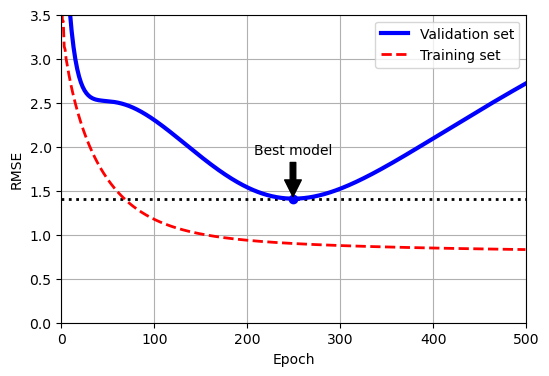

In [60]:
from copy import deepcopy
from sklearn.preprocessing import StandardScaler

# extra code – creates the same quadratic dataset as earlier and splits it
np.random.seed(42)
m = 100
X = 6 * np.random.rand(m, 1) - 3
y = 0.5 * X ** 2 + X + 2 + np.random.randn(m, 1)
X_train, y_train = X[: m // 2], y[: m // 2, 0]
X_valid, y_valid = X[m // 2 :], y[m // 2 :, 0]

preprocessing = Pipeline([
        ("poly_features", PolynomialFeatures(degree=90, include_bias=False)),
        ("std_scaler", StandardScaler())
    ])
X_train_prep = preprocessing.fit_transform(X_train)
X_valid_prep = preprocessing.transform(X_valid)
sgd_reg = SGDRegressor(penalty=None, eta0=0.002, random_state=42)
n_epochs = 500
best_valid_rmse = float('inf')
train_errors, val_errors = [], []  # extra code – it's for the figure below

for epoch in range(n_epochs):
    sgd_reg.partial_fit(X_train_prep, y_train)
    y_valid_predict = sgd_reg.predict(X_valid_prep)
    val_error = root_mean_squared_error(y_valid, y_valid_predict)
    if val_error < best_valid_rmse:
        best_valid_rmse = val_error
        best_model = deepcopy(sgd_reg)

    # extra code – we evaluate the train error and save it for the figure
    y_train_predict = sgd_reg.predict(X_train_prep)
    train_error = root_mean_squared_error(y_train, y_train_predict)
    val_errors.append(val_error)
    train_errors.append(train_error)

# extra code – this section generates and saves Figure 4–20
best_epoch = np.argmin(val_errors)
plt.figure(figsize=(6, 4))
plt.annotate('Best model',
             xy=(best_epoch, best_valid_rmse),
             xytext=(best_epoch, best_valid_rmse + 0.5),
             ha="center",
             arrowprops=dict(facecolor='black', shrink=0.05))
plt.plot([0, n_epochs], [best_valid_rmse, best_valid_rmse], "k:", linewidth=2)
plt.plot(val_errors, "b-", linewidth=3, label="Validation set")
plt.plot(best_epoch, best_valid_rmse, "bo")
plt.plot(train_errors, "r--", linewidth=2, label="Training set")
plt.legend(loc="upper right")
plt.xlabel("Epoch")
plt.ylabel("RMSE")
plt.axis([0, n_epochs, 0, 3.5])
plt.grid()
plt.show()


In [61]:
best_epoch, best_model

(np.int64(249), SGDRegressor(eta0=0.002, penalty=None, random_state=42))

# 3. Logisitic Regression

Similar to linear regression, but instead of predicting the value; here we predict the probablity. If estimated probablity is over 50% model will predict the instance to belong to that class. <br>
Logistic regression model estimates probablity by: <br> 
$\^P = h_{\theta}(x) = \sigma(x^T\theta)$

$\sigma$ is Sigmoid function which can output data between 0 and 1 <br>
$\sigma(t) = 1/(1-e^{-t})$ 

``` 
Training & Cost Function
``` 
$J(\theta) = -(1/m) \sum_{i=1}^{n} [(y_i log(\^P_i)) + ((1-y_i) log(1-\^P_i))] $

(np.float64(-10.0), np.float64(10.0), np.float64(-0.1), np.float64(1.1))

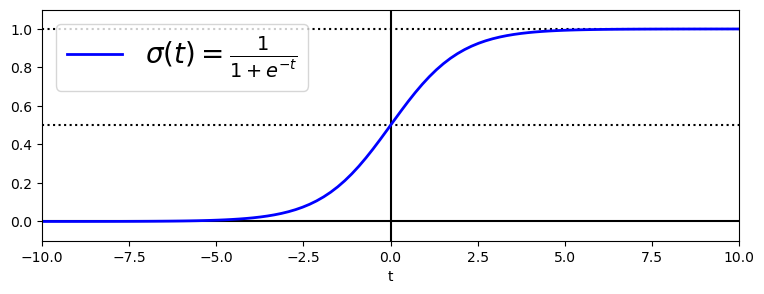

In [62]:
t = np.linspace(-10, 10, 100)

# calculat sigma 
sig = 1 / (1 + np.exp(-t))
plt.figure(figsize=(9, 3))
plt.plot([-10, 10], [0, 0], "k-")
plt.plot([-10, 10], [0.5, 0.5], "k:")
plt.plot([-10, 10], [1, 1], "k:")
plt.plot([0, 0], [-1.1, 1.1], "k-")
plt.plot(t, sig, "b-", linewidth=2, label=r"$\sigma(t) = \frac{1}{1 + e^{-t}}$")
plt.xlabel("t")
plt.legend(loc="upper left", fontsize=20)
plt.axis([-10, 10, -0.1, 1.1])

#### Decision Bounday 
```
Understanding logistic regression using Iris flower dataset. 
There are 3 different species of Iris flowers - a. Virginica, b. Versicolor, c. Setosa 
This dataset containts sepal and petal length and width of 150 iris flowers of all 3 different species

In [63]:
from sklearn import datasets
iris = datasets.load_iris()
list(iris.keys())

['data',
 'target',
 'frame',
 'target_names',
 'DESCR',
 'feature_names',
 'filename',
 'data_module']

In [64]:
print (iris.DESCR)

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

:Number of Instances: 150 (50 in each of three classes)
:Number of Attributes: 4 numeric, predictive attributes and the class
:Attribute Information:
    - sepal length in cm
    - sepal width in cm
    - petal length in cm
    - petal width in cm
    - class:
            - Iris-Setosa
            - Iris-Versicolour
            - Iris-Virginica

:Summary Statistics:

============== ==== ==== ======= ===== ====================
                Min  Max   Mean    SD   Class Correlation
============== ==== ==== ======= ===== ====================
sepal length:   4.3  7.9   5.84   0.83    0.7826
sepal width:    2.0  4.4   3.05   0.43   -0.4194
petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
============== ==== ==== ======= ===== ====================

:Missing Attribute Values: None
:Class Distribution: 33.3% for each of 3 classes.
:Cr

In [65]:
# lets look data for first 10 rows in the dataset 
iris.data[:10, :]

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1]])

In [66]:
iris.target[:10]

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [67]:
iris.target_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [68]:
iris.feature_names

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [69]:
np.unique(iris.target)

array([0, 1, 2])

``` 
target 
values 0 -> setosa 
value 1 -> Versicolor 
value 2 -> Virginca

In [70]:
# lets try to build classifier model which can predict if Virginica using petal width only

# take only petal width 
X = iris.data[:, 3:] 

# take 0 and 1 value for Virginica flower. 1 if it is else 0 
y = (iris.target == 2)

In [71]:
# train logistic regression model 
from sklearn.linear_model import LogisticRegression
log_reg = LogisticRegression(solver="lbfgs", random_state=42)
log_reg.fit(X, y)

LogisticRegression(random_state=42)

In [72]:
np.linspace(0,3, 5)

array([0.  , 0.75, 1.5 , 2.25, 3.  ])

In [73]:
np.linspace(0,3, 5).reshape(-1, 1)

array([[0.  ],
       [0.75],
       [1.5 ],
       [2.25],
       [3.  ]])

In [74]:
# create 1000 evenly spaces value between 0 and 3
X_new = np.linspace(0,3, 1000).reshape(-1, 1)

# predict probablity score if given petal width is likely to be Viriginica or not (0 column will have False, and 1 will have True)
y_proba = log_reg.predict_proba(X_new)

``` 
Used predict_proba() method instead of predict() method. If latter used it will return True or False for instances it is more likely to get classified

In [75]:
y_proba[:10]

array([[9.99249051e-01, 7.50949397e-04],
       [9.99239224e-01, 7.60776030e-04],
       [9.99229269e-01, 7.70731151e-04],
       [9.99219184e-01, 7.80816439e-04],
       [9.99208966e-01, 7.91033591e-04],
       [9.99198616e-01, 8.01384329e-04],
       [9.99188130e-01, 8.11870398e-04],
       [9.99177506e-01, 8.22493563e-04],
       [9.99166744e-01, 8.33255615e-04],
       [9.99155842e-01, 8.44158365e-04]])

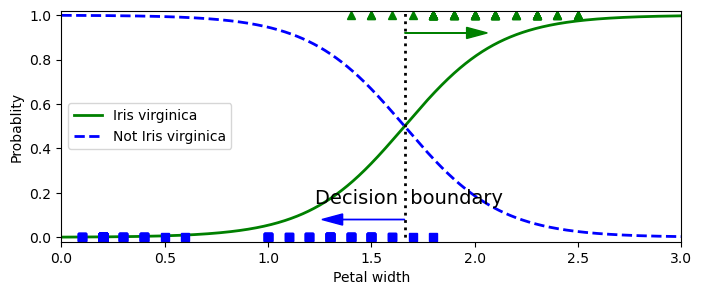

In [ ]:
# Now lets check the plot for either Virginca or not Virginica 
plt.figure(figsize=(8, 3))
plt.axis([0, 3, -0.02, 1.02])

# plot the values either viriginica or not 
plt.plot(X_new, y_proba[:, 1], "g-", linewidth=2, label="Iris virginica")
plt.plot(X_new, y_proba[:, 0], "b--", linewidth=2, label="Not Iris virginica")

# get decision boundary value where probablity score is more than 0.5
decision_boundary = X_new[y_proba[:,1] >= 0.5][0]

# draw a line for decision boundary 
plt.plot([decision_boundary, decision_boundary], [-1, 2], "k:", linewidth=2)
plt.text(decision_boundary+0.02, 0.15, "Decision  boundary", fontsize=14, color="k", ha="center")

# add lines suggesting anything at left of decision boundary is non virginica flower 
plt.arrow(x=decision_boundary[0], y=0.08, dx=-0.3, dy=0, head_width=0.05, head_length=0.1, fc='b', ec='b')

# and anything to the right of decision boundary is virginica flower
plt.arrow(x=decision_boundary[0], y=0.92, dx=0.3, dy=0, head_width=0.05, head_length=0.1, fc='g', ec='g')

# add blue squares for non viginica flower
plt.plot(X[y==0], y[y==0], "bs")

# add green triangle for virginica flower 
plt.plot(X[y==1], y[y==1], "g^")

plt.xlabel("Petal width")
plt.ylabel("Probablity")
plt.legend(loc="center left")

``` 
Petal width of Iris Virginica flowers (represented by Green triangles) range from 1.4 cm to 2.5 cm. While other flowers (represented by Blue Squares) have relatively lower petal width ranging from 0.1 cm to 1.8 cm.

There is a bit of overlap however, after 2 cm the classifier (see green curve) is sure that the flower is Iris Virginica. And below 1cm it is classifier is confident that flower is not Virginica

However between 1cm to 2cm -> classifier is not confident if flower is Virginica or not. 

There is a decision boundary at 1.6 cm where probablity if flower is virginica or not is greater than 50%. If proablity score is more than 50% then classifier will classify flower as Virginica otherwise Non-Virginica even though it is not very conficident

In [ ]:
# to check this put petal width 1.7 and 1.5. Ideally 1.7 cm petal width will be classified as Virginica and 1.5 as Non-Virginica
log_reg.predict([[1.7], [1.5]])


array([ True, False])

#### This time use 2 features petal width and length - Logistic Regression

In [79]:
# this time take petal length and petal width 
X = iris.data[:, 2:] 

# get True/False for target i.e. if flower is Virginica or not 
y = (iris.target == 2)

# Create logistic Regression model 
log_reg = LogisticRegression(solver="lbfgs", C=10**10, random_state=42)
log_reg.fit(X, y)

# create list of numbers to plot contour 
x0, x1 = np.meshgrid(
        np.linspace(2.9, 7, 500).reshape(-1, 1),
        np.linspace(0.8, 2.7, 200).reshape(-1, 1),
    )

# one instance per point on the figure 
X_new = np.c_[x0.ravel(), x1.ravel()]

# predict probablity score for X_new
y_proba = log_reg.predict_proba(X_new)

In [86]:
(y==0)[:10]

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True])

(np.float64(2.9), np.float64(7.0), np.float64(0.8), np.float64(2.7))

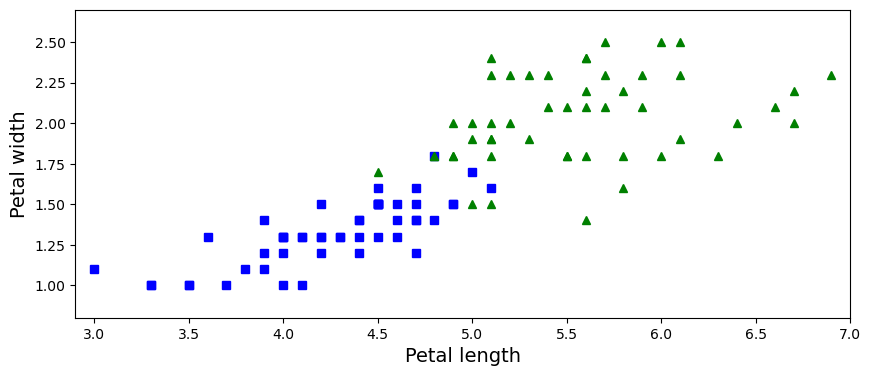

In [87]:
plt.figure(figsize=(10, 4))

# plot all X values which are Non-Virginica (y==0) and get petal length (X[y==0, 0] second 0 is index of the petal length) and petal width (X[y==0, 1] 1 indicates petal width)
plt.plot(X[y==0, 0], X[y==0, 1], "bs")

# plot all X values which are Virginica flower and get the petal length and petal width
plt.plot(X[y==1, 0], X[y==1, 1], "g^")

plt.xlabel("Petal length", fontsize=14)
plt.ylabel("Petal width", fontsize=14)
plt.axis([2.9, 7, 0.8, 2.7])

In [88]:
y_proba[:10]

array([[9.99999998e-01, 1.60015753e-09],
       [9.99999998e-01, 1.67775966e-09],
       [9.99999998e-01, 1.75912522e-09],
       [9.99999998e-01, 1.84443673e-09],
       [9.99999998e-01, 1.93388556e-09],
       [9.99999998e-01, 2.02767235e-09],
       [9.99999998e-01, 2.12600747e-09],
       [9.99999998e-01, 2.22911151e-09],
       [9.99999998e-01, 2.33721573e-09],
       [9.99999998e-01, 2.45056264e-09]])

Text(6.5, 2.3, 'Iris virginica')

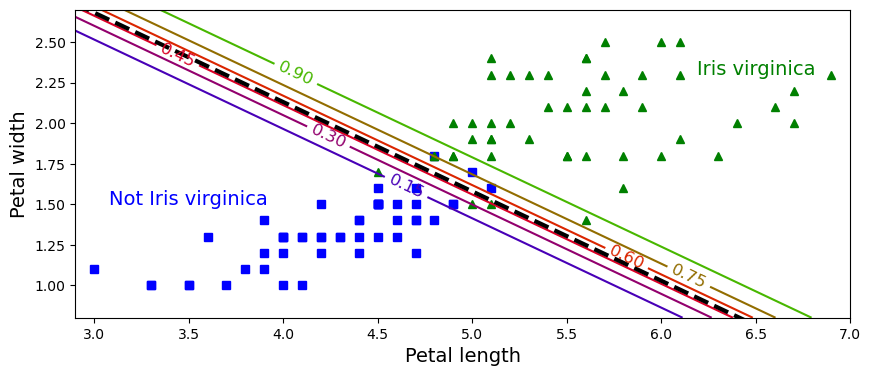

In [91]:
plt.figure(figsize=(10, 4))

# plot all X values which are Non-Virginica (y==0) and get petal length (X[y==0, 0] second 0 is index of the petal length) and petal width (X[y==0, 1] 1 indicates petal width)
plt.plot(X[y==0, 0], X[y==0, 1], "bs")

# plot all X values which are Virginica flower and get the petal length and petal width
plt.plot(X[y==1, 0], X[y==1, 1], "g^")

plt.xlabel("Petal length", fontsize=14)
plt.ylabel("Petal width", fontsize=14)
plt.axis([2.9, 7, 0.8, 2.7])

# create decision boundaries 
zz = y_proba[:, 1].reshape(x0.shape)
contour = plt.contour(x0, x1, zz, cmap=plt.cm.brg)
plt.clabel(contour, inline=1, fontsize=12)

left_right = np.array([2.9, 7])
boundary = -(log_reg.coef_[0][0] * left_right + log_reg.intercept_[0]) / log_reg.coef_[0][1]

plt.plot(left_right, boundary, "k--", linewidth=3)
plt.text(3.5, 1.5, "Not Iris virginica", fontsize=14, color="b", ha="center")
plt.text(6.5, 2.3, "Iris virginica", fontsize=14, color="g", ha="center")

As we have learnt earlier Logistic regression is strictly Binary Classifier. We will use Softmax regression which allows to perform multinomial predictions
For each instance x, softmax regression model first computes score $S_k(x)$ for each class k. Then it calculates the probablity by applying softmax function: <br>
Score = $S_k(x) = x^T \theta_k$ <br>
Prediction = $\^p_k = \sigma(s(x))_k = (\exp^{s_k(x)} / \sum_{j=1}^{k} \exp_{s_k(x)})$
<br><br>
Cost Function:<br>
$J(\theta) = -1/m \sum_{i=1}^{m} \sum_{k=1}^{K} y_{k}^i log (\^p_{k}^{i})$

In [92]:
X = iris["data"][:, (2, 3)]  # petal length, petal width
y = iris["target"]

softmax_reg = LogisticRegression(multi_class="multinomial", solver="lbfgs", C=10, random_state=42)
softmax_reg.fit(X, y)

/Users/rohitabhishek/miniconda3/envs/mlenv/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


LogisticRegression(C=10, multi_class='multinomial', random_state=42)

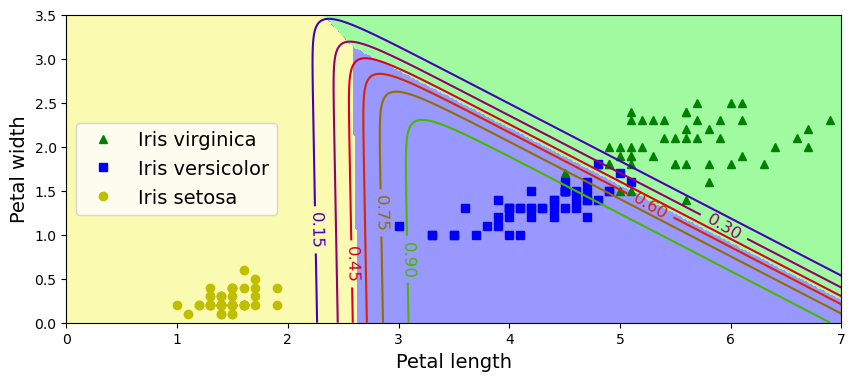

In [94]:
x0, x1 = np.meshgrid(
        np.linspace(0, 8, 500).reshape(-1, 1),
        np.linspace(0, 3.5, 200).reshape(-1, 1),
    )
X_new = np.c_[x0.ravel(), x1.ravel()]


y_proba = softmax_reg.predict_proba(X_new)
y_predict = softmax_reg.predict(X_new)

zz1 = y_proba[:, 1].reshape(x0.shape)
zz = y_predict.reshape(x0.shape)

plt.figure(figsize=(10, 4))
plt.plot(X[y==2, 0], X[y==2, 1], "g^", label="Iris virginica")
plt.plot(X[y==1, 0], X[y==1, 1], "bs", label="Iris versicolor")
plt.plot(X[y==0, 0], X[y==0, 1], "yo", label="Iris setosa")

from matplotlib.colors import ListedColormap
custom_cmap = ListedColormap(['#fafab0','#9898ff','#a0faa0'])

plt.contourf(x0, x1, zz, cmap=custom_cmap)
contour = plt.contour(x0, x1, zz1, cmap=plt.cm.brg)
plt.clabel(contour, inline=1, fontsize=12)
plt.xlabel("Petal length", fontsize=14)
plt.ylabel("Petal width", fontsize=14)
plt.legend(loc="center left", fontsize=14)
plt.axis([0, 7, 0, 3.5])
plt.show()

In [95]:
softmax_reg.predict([[5, 2]])

array([2])

In [96]:
softmax_reg.predict_proba([[5, 2]])

array([[6.21626371e-07, 5.73689802e-02, 9.42630398e-01]])

# Exercises

``` 
Q1 - Which Linear Regression to use of you have millions of features? 
Ans: SGD or Mini Batch. Batch Gradient Descent if we can fit the data to memory. 
Normal equation cannot be used as complexity will rise quickly.

Q2. Features have different scales. Which algo might suffer from this and how? What can we do about it?    
Ans: If features are of different scales. the cost function will be elongated bowl. Thus Gradient Descent will take longer to converge. 
Solve this by scaling the data before training. 
NOTE - Normal Equation and SVD will work fine without scaling. 

Also, drawback to unscaled data is the regularization may converge to suboptimal solution. Since regularization penalizes higher weights. Features with smaller weights may get ignored because of larger weights

Q3. Can Gradient Descent stuck at local minima when training a Logistic regression?
Ans: No. Cost function of Logistic regression is convex. It cannot stuck at local minima

Q4. Do all gradient descent to lead to same model provided you let them run logn enough?
Ans: Since cost function of linear regression is convex. Assuming learning rate is not that high, all Gradient Descent algo will apporach to global optimum and end up producing fairly similar models.
However if we reduce the learning rate, Stochastic and mini-batch may never converge; instead they will jump around global minimum

Q5. You are using Batch Gradient Descent. Validation error is going up consistently. What is going on ? How to fix this? 
Ans: The model is likely overfitting. To ensure the model does not overfit - we can use regularization or stop early during epochs when validation just begun to go up.

Q6. Is it a good idea to stop mini-batch GD immediately when validation error goes up?
Ans: Due to random nature of SGD and mini-batch is not guranteed to make progress in each iteration. If you stop immediately we might have stopped way early before reaching global optimum.
Best way to deal with such case is to keep saving the model and if it has not improved for long enough - revert last best saved model. 

Q7. Which Gradient Descent will reach optimal solution faster? Which will actually converge? How to make other converge as well?
Ans: Stochastic will reach optimal solution faster. Batch will only converge given there is enough time for training. SGD and Mini batch will jump around optimum solution unless we reduce the learning rate

Q8. You are using Polynomial regression. Plot learning curves and large gap between training error and validation error - what is going on. How to solve it?
Ans: Overfitting. 
a. Use regularization 
b. Stop early 
c. try increasing training size

Q9. Using Ridge regression. Training error and Validation errors are high and equal. Is model suffering from higher variance or higher bias? Should you increase Alpha hyperparameter? 
Ans: Model is clearly underfitting, this means there is high bias. Try reducing Alpha hyperparameter.

Q10. Why do you want to use - 
a. Ridge Regression instead of Linear Regression
b. Lasso instead of Ridge
c. Elastic net instead of Lasso 

Ans: a. Model with some regularization performs better than no regularization. 
b. Lasso uses l1 penatly and tends to push weights down to zero. This leads sparse model - automatic feature selection
c. Elastic Net is generally preferred over Lasso since lasso may behave erratic when number of features are more than the training data and features are stronly correlated

Q11. You want to classify picture as outdoor/indoor and daytime/nighttime. Should you implement 2 logistic regression or 1 softmax?
Ans: since these classes are not mutually exclusive. Combinations of all 4 are possbile - thus 2 logistic regression


In [97]:
# Q12 - Implement softmax regression with early stopping w/o scikit learn
X = iris["data"][:, (2, 3)]  # petal length, petal width
y = iris["target"]

In [98]:
# add bias term x0 for every instance 
X_with_bias = np.c_[np.ones([len(X), 1]), X]

In [99]:
np.random.seed(2042)

In [100]:
# split test and training set w/o scikit 
test_ratio = 0.2
validation_ratio = 0.2
total_size = len(X_with_bias)

test_size = int(total_size * test_ratio)
validation_size = int(total_size * validation_ratio)
train_size = total_size - test_size - validation_size

rnd_indices = np.random.permutation(total_size)

X_train = X_with_bias[rnd_indices[:train_size]]
y_train = y[rnd_indices[:train_size]]
X_valid = X_with_bias[rnd_indices[train_size:-test_size]]
y_valid = y[rnd_indices[train_size:-test_size]]
X_test = X_with_bias[rnd_indices[-test_size:]]
y_test = y[rnd_indices[-test_size:]]

The targets are currently class indices (0, 1 or 2), but we need target class probabilities to train the Softmax Regression model. Each instance will have target class probabilities equal to 0.0 for all classes except for the target class which will have a probability of 1.0 (in other words, the vector of class probabilities for ay given instance is a one-hot vector). Let's write a small function to convert the vector of class indices into a matrix containing a one-hot vector for each instance:

In [101]:
def to_one_hot(y):
    n_classes = y.max() + 1
    m = len(y)
    Y_one_hot = np.zeros((m, n_classes))
    Y_one_hot[np.arange(m), y] = 1
    return Y_one_hot

In [102]:
y_train[:10]

array([0, 1, 2, 1, 1, 0, 1, 1, 1, 0])

In [103]:
to_one_hot(y_train[:10])

array([[1., 0., 0.],
       [0., 1., 0.],
       [0., 0., 1.],
       [0., 1., 0.],
       [0., 1., 0.],
       [1., 0., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [1., 0., 0.]])

In [104]:
Y_train_one_hot = to_one_hot(y_train)
Y_valid_one_hot = to_one_hot(y_valid)
Y_test_one_hot = to_one_hot(y_test)

In [105]:
def softmax(logits):
    exps = np.exp(logits)
    exp_sums = np.sum(exps, axis=1, keepdims=True)
    return exps / exp_sums

In [106]:
n_inputs = X_train.shape[1] # == 3 (2 features plus the bias term)
n_outputs = len(np.unique(y_train))   # == 3 (3 iris classes)

In [107]:
eta = 0.01
n_iterations = 5001
m = len(X_train)
epsilon = 1e-7

Theta = np.random.randn(n_inputs, n_outputs)

for iteration in range(n_iterations):
    logits = X_train.dot(Theta)
    Y_proba = softmax(logits)
    if iteration % 500 == 0:
        loss = -np.mean(np.sum(Y_train_one_hot * np.log(Y_proba + epsilon), axis=1))
        print(iteration, loss)
    error = Y_proba - Y_train_one_hot
    gradients = 1/m * X_train.T.dot(error)
    Theta = Theta - eta * gradients

0 5.446205811872683
500 0.8350062641405651
1000 0.6878801447192402
1500 0.6012379137693314
2000 0.5444496861981872
2500 0.5038530181431525
3000 0.47292289721922487
3500 0.44824244188957774
4000 0.4278651093928793
4500 0.41060071429187134
5000 0.3956780375390374


In [108]:
Theta

array([[ 3.32094157, -0.6501102 , -2.99979416],
       [-1.1718465 ,  0.11706172,  0.10507543],
       [-0.70224261, -0.09527802,  1.4786383 ]])

In [109]:
logits = X_valid.dot(Theta)
Y_proba = softmax(logits)
y_predict = np.argmax(Y_proba, axis=1)

accuracy_score = np.mean(y_predict == y_valid)
accuracy_score

np.float64(0.9666666666666667)

In [110]:
eta = 0.1
n_iterations = 5001
m = len(X_train)
epsilon = 1e-7
alpha = 0.1  # regularization hyperparameter

Theta = np.random.randn(n_inputs, n_outputs)

for iteration in range(n_iterations):
    logits = X_train.dot(Theta)
    Y_proba = softmax(logits)
    if iteration % 500 == 0:
        xentropy_loss = -np.mean(np.sum(Y_train_one_hot * np.log(Y_proba + epsilon), axis=1))
        l2_loss = 1/2 * np.sum(np.square(Theta[1:]))
        loss = xentropy_loss + alpha * l2_loss
        print(iteration, loss)
    error = Y_proba - Y_train_one_hot
    gradients = 1/m * X_train.T.dot(error) + np.r_[np.zeros([1, n_outputs]), alpha * Theta[1:]]
    Theta = Theta - eta * gradients

0 6.629842469083912
500 0.5339667976629506
1000 0.503640075014894
1500 0.49468910594603216
2000 0.4912968418075477
2500 0.48989924700933296
3000 0.4892990598451198
3500 0.48903512443978603
4000 0.4889173621830818
4500 0.4888643337449303
5000 0.4888403120738818


In [111]:
logits = X_valid.dot(Theta)
Y_proba = softmax(logits)
y_predict = np.argmax(Y_proba, axis=1)

accuracy_score = np.mean(y_predict == y_valid)
accuracy_score

np.float64(1.0)

In [113]:
eta = 0.1 
n_iterations = 5001
m = len(X_train)
epsilon = 1e-7
alpha = 0.1  # regularization hyperparameter
best_loss = np.inf

Theta = np.random.randn(n_inputs, n_outputs)

for iteration in range(n_iterations):
    logits = X_train.dot(Theta)
    Y_proba = softmax(logits)
    error = Y_proba - Y_train_one_hot
    gradients = 1/m * X_train.T.dot(error) + np.r_[np.zeros([1, n_outputs]), alpha * Theta[1:]]
    Theta = Theta - eta * gradients

    logits = X_valid.dot(Theta)
    Y_proba = softmax(logits)
    xentropy_loss = -np.mean(np.sum(Y_valid_one_hot * np.log(Y_proba + epsilon), axis=1))
    l2_loss = 1/2 * np.sum(np.square(Theta[1:]))
    loss = xentropy_loss + alpha * l2_loss
    if iteration % 500 == 0:
        print(iteration, loss)
    if loss < best_loss:
        best_loss = loss
    else:
        print(iteration - 1, best_loss)
        print(iteration, loss, "early stopping!")
        break

0 4.7096017363419875
500 0.5739711987633518
1000 0.5435638529109128
1500 0.5355752782580261
2000 0.5331959249285544
2500 0.5325946767399383
2765 0.5325460966791898
2766 0.5325460971327977 early stopping!


In [114]:
logits = X_valid.dot(Theta)
Y_proba = softmax(logits)
y_predict = np.argmax(Y_proba, axis=1)

accuracy_score = np.mean(y_predict == y_valid)
accuracy_score

np.float64(1.0)

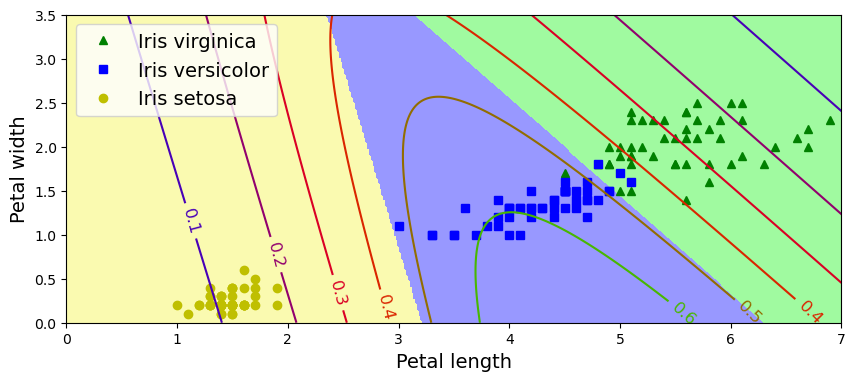

In [115]:
x0, x1 = np.meshgrid(
        np.linspace(0, 8, 500).reshape(-1, 1),
        np.linspace(0, 3.5, 200).reshape(-1, 1),
    )
X_new = np.c_[x0.ravel(), x1.ravel()]
X_new_with_bias = np.c_[np.ones([len(X_new), 1]), X_new]

logits = X_new_with_bias.dot(Theta)
Y_proba = softmax(logits)
y_predict = np.argmax(Y_proba, axis=1)

zz1 = Y_proba[:, 1].reshape(x0.shape)
zz = y_predict.reshape(x0.shape)

plt.figure(figsize=(10, 4))
plt.plot(X[y==2, 0], X[y==2, 1], "g^", label="Iris virginica")
plt.plot(X[y==1, 0], X[y==1, 1], "bs", label="Iris versicolor")
plt.plot(X[y==0, 0], X[y==0, 1], "yo", label="Iris setosa")

from matplotlib.colors import ListedColormap
custom_cmap = ListedColormap(['#fafab0','#9898ff','#a0faa0'])

plt.contourf(x0, x1, zz, cmap=custom_cmap)
contour = plt.contour(x0, x1, zz1, cmap=plt.cm.brg)
plt.clabel(contour, inline=1, fontsize=12)
plt.xlabel("Petal length", fontsize=14)
plt.ylabel("Petal width", fontsize=14)
plt.legend(loc="upper left", fontsize=14)
plt.axis([0, 7, 0, 3.5])
plt.show()

In [116]:
logits = X_test.dot(Theta)
Y_proba = softmax(logits)
y_predict = np.argmax(Y_proba, axis=1)

accuracy_score = np.mean(y_predict == y_test)
accuracy_score

np.float64(0.9333333333333333)